In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [2]:
pip install kaggle

In [3]:
!kaggle datasets download -d rakeshkapilavai/extrovert-vs-introvert-behavior-data

Dataset URL: https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data
License(s): CC-BY-SA-4.0
  0% 0.00/30.5k [00:00<?, ?B/s]
100% 30.5k/30.5k [00:00<00:00, 155MB/s]


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
# from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, f1_score

In [11]:
df = pd.read_csv('personality_datasert.csv')
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [15]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

# Define numeric and categorical columns
numeric_columns = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_columns = ['Stage_fear', 'Drained_after_socializing']
target_column = 'Personality'

# Verify categorical values
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts(dropna=False))

Dataset Shape: (2900, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB
None

Missing Values:
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
P

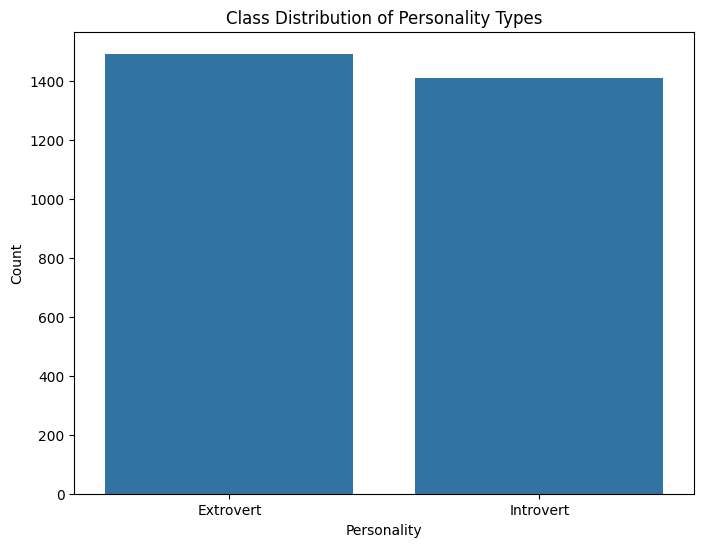

In [17]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.title('Class Distribution of Personality Types')
plt.xlabel('Personality')
plt.ylabel('Count')
plt.show()


Correlation of Features with Target:
Personality                1.000000
Time_spent_Alone           0.712468
Friends_circle_size       -0.687203
Post_frequency            -0.721062
Social_event_attendance   -0.721520
Going_outside             -0.739251
Name: Personality, dtype: float64


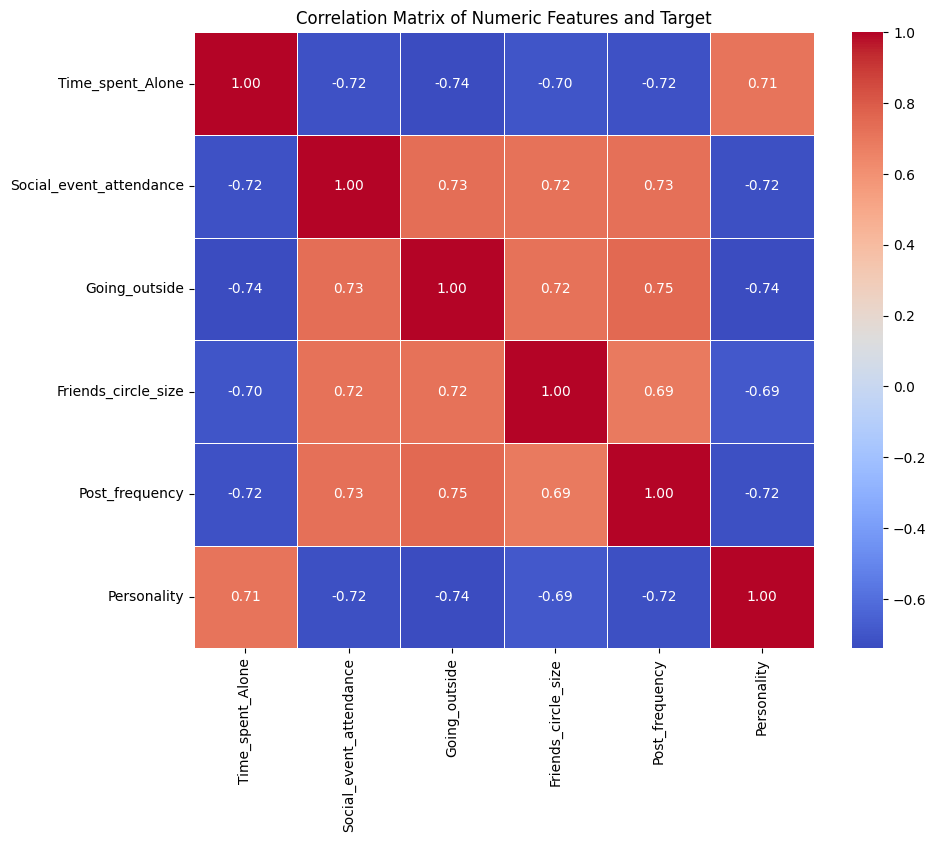

In [18]:
# prompt: saya ingin tahu corelasi fitur dengan target column

# Calculate correlation matrix for numeric features and the target (after encoding)
df_encoded = df.copy()
# Encode the target variable for correlation calculation
le = LabelEncoder()
df_encoded[target_column] = le.fit_transform(df_encoded[target_column])

# Include encoded target column in the correlation calculation
correlation_matrix = df_encoded[numeric_columns + [target_column]].corr()

# Display correlation with the target variable
print("\nCorrelation of Features with Target:")
print(correlation_matrix[target_column].sort_values(ascending=False))

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features and Target')
plt.show()


In [22]:
# prompt: korelasi kolom kategorikal dengan target colom

import pandas as pd
# Function to analyze correlation for categorical columns
def analyze_categorical_correlation(df, categorical_cols, target_col):
    print("\nAnalyzing Correlation for Categorical Features with Target:")
    for col in categorical_cols:
        # Use crosstab for categorical correlation (or independence test)
        crosstab_result = pd.crosstab(df[col], df[target_col])
        print(f"\nCrosstabulation of {col} and {target_col}:\n", crosstab_result)
# Analyze categorical correlations
analyze_categorical_correlation(df, categorical_columns, target_column)


Analyzing Correlation for Categorical Features with Target:

Crosstabulation of Stage_fear and Personality:
 Personality  Extrovert  Introvert
Stage_fear                       
No                1380        110
Yes                111       1299

Crosstabulation of Drained_after_socializing and Personality:
 Personality                Extrovert  Introvert
Drained_after_socializing                      
No                              1380        113
Yes                              111       1296



Visualizing Outliers using Box Plots:


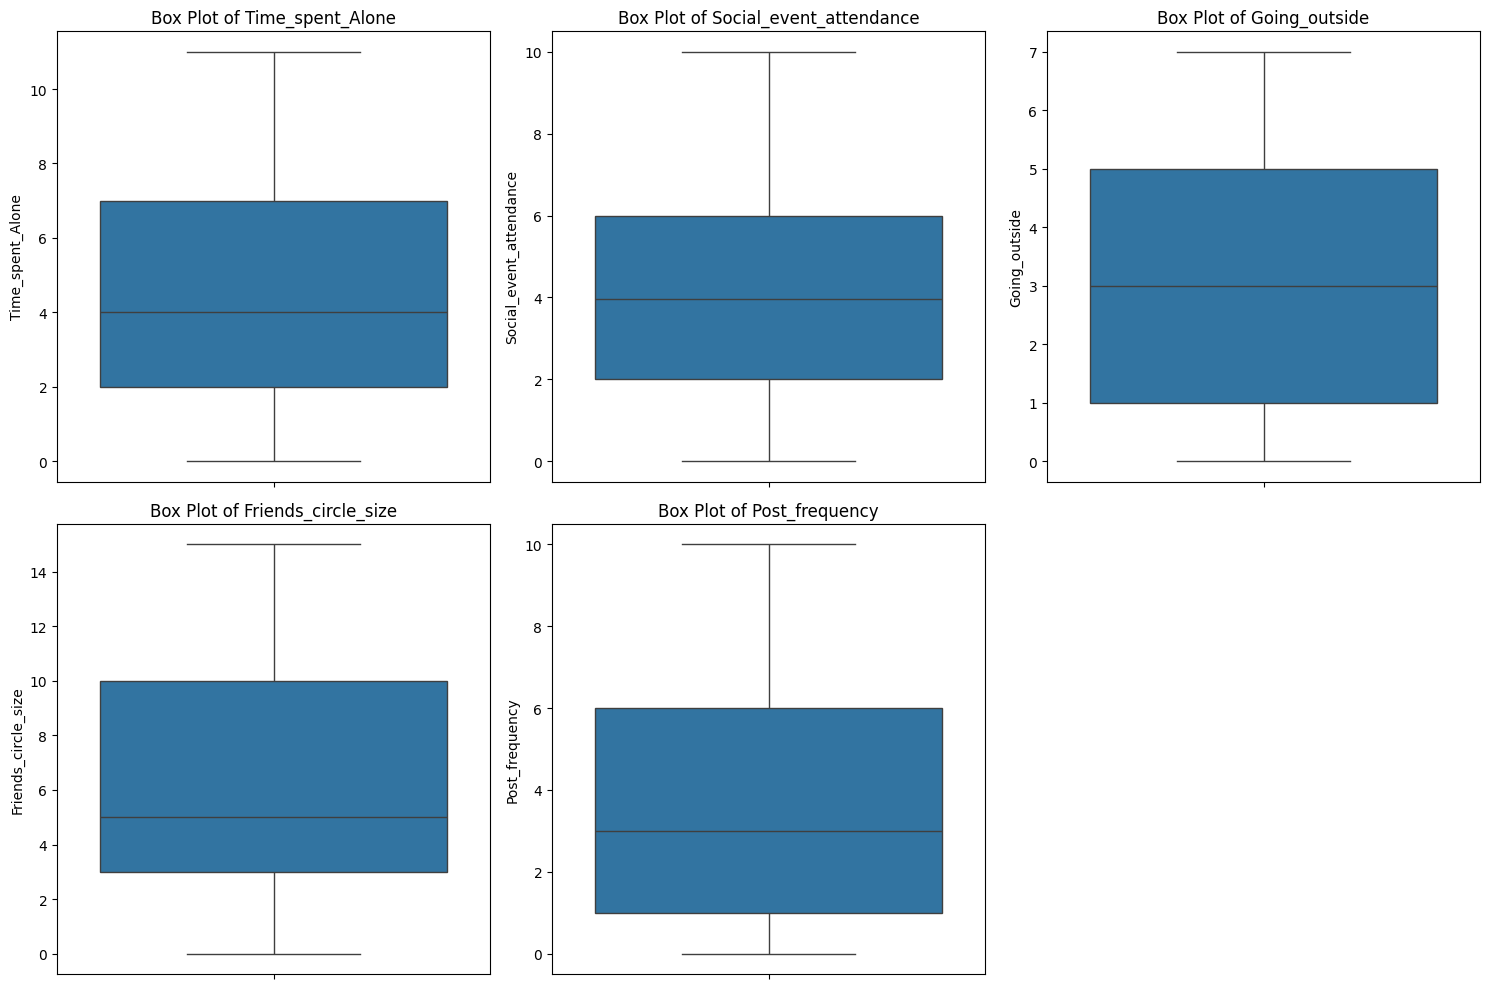


Quantifying Outliers using IQR:
Column: Time_spent_Alone
  IQR Lower Bound: -5.50
  IQR Upper Bound: 14.50
  Number of Outliers (IQR): 0
  Percentage of Outliers (IQR): 0.00%
Column: Social_event_attendance
  IQR Lower Bound: -4.00
  IQR Upper Bound: 12.00
  Number of Outliers (IQR): 0
  Percentage of Outliers (IQR): 0.00%
Column: Going_outside
  IQR Lower Bound: -5.00
  IQR Upper Bound: 11.00
  Number of Outliers (IQR): 0
  Percentage of Outliers (IQR): 0.00%
Column: Friends_circle_size
  IQR Lower Bound: -7.50
  IQR Upper Bound: 20.50
  Number of Outliers (IQR): 0
  Percentage of Outliers (IQR): 0.00%
Column: Post_frequency
  IQR Lower Bound: -6.50
  IQR Upper Bound: 13.50
  Number of Outliers (IQR): 0
  Percentage of Outliers (IQR): 0.00%


In [24]:
# prompt: cek outlier

# Function to visualize outliers using box plots
def plot_outliers(df, numeric_cols):
    print("\nVisualizing Outliers using Box Plots:")
    num_cols = len(numeric_cols)
    n_cols = 3  # Number of columns per row for subplots
    n_rows = (num_cols + n_cols - 1) // n_cols

    plt.figure(figsize=(15, n_rows * 5))
    for i, col in enumerate(numeric_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot of {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Plot outliers for numeric columns
plot_outliers(df, numeric_columns)

# Optional: Quantify outliers using IQR
def quantify_outliers_iqr(df, numeric_cols):
    print("\nQuantifying Outliers using IQR:")
    outlier_info = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = outliers.shape[0]
        outlier_percentage = (outlier_count / df.shape[0]) * 100

        outlier_info[col] = {
            'Lower Bound (IQR)': lower_bound,
            'Upper Bound (IQR)': upper_bound,
            'Outlier Count': outlier_count,
            'Outlier Percentage': f"{outlier_percentage:.2f}%"
        }
        print(f"Column: {col}")
        print(f"  IQR Lower Bound: {lower_bound:.2f}")
        print(f"  IQR Upper Bound: {upper_bound:.2f}")
        print(f"  Number of Outliers (IQR): {outlier_count}")
        print(f"  Percentage of Outliers (IQR): {outlier_percentage:.2f}%")
        if outlier_count > 0:
            print(f"  Outlier values (sample): {outliers[col].tolist()[:10]}...") # print first 10 outliers

# Quantify outliers
quantify_outliers_iqr(df, numeric_columns)

In [25]:
# Encode target variable
le = LabelEncoder()
df[target_column] = le.fit_transform(df[target_column])
print(f"Encoded classes: {dict(zip(le.classes_, le.transform(le.classes_)))}")

# Categorical features: impute with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Encode categorical features
data = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Update feature list
encoded_columns = [col for col in data.columns if col != target_column]

Encoded classes: {'Extrovert': np.int64(0), 'Introvert': np.int64(1)}


In [29]:
# prompt: tampilkan data yang sudah di preporcessing

# Display the first few rows of the preprocessed data
print("\nPreprocessed Data:")
print(data.head())

# Display information about the preprocessed data
print("\nPreprocessed Data Info:")
print(data.info())

# Display missing values in the preprocessed data (should be none after imputation)
print("\nMissing Values in Preprocessed Data:")
print(data.isnull().sum().sum()) # Sum of missing values across all columns

# Display the shape of the preprocessed data
print("\nPreprocessed Data Shape:", data.shape)


Preprocessed Data:
   Time_spent_Alone  Social_event_attendance  Going_outside  \
0               4.0                      4.0            6.0   
1               9.0                      0.0            0.0   
2               9.0                      1.0            2.0   
3               0.0                      6.0            7.0   
4               3.0                      9.0            4.0   

   Friends_circle_size  Post_frequency  Personality  Stage_fear_Yes  \
0                 13.0             5.0            0           False   
1                  0.0             3.0            1            True   
2                  5.0             2.0            1            True   
3                 14.0             8.0            0           False   
4                  8.0             5.0            0           False   

   Drained_after_socializing_Yes  
0                          False  
1                           True  
2                           True  
3                          False  

In [35]:
# prompt: saya ingin lihat isi dari target column setelah di preprocessing

print("\nContents of Target Column after Preprocessing:")
print(data[target_column].value_counts())
print("\nFirst 5 values of Target Column after Preprocessing:")
print(data[target_column].head())


Contents of Target Column after Preprocessing:
Personality
0    1491
1    1409
Name: count, dtype: int64

First 5 values of Target Column after Preprocessing:
0    0
1    1
2    1
3    0
4    0
Name: Personality, dtype: int64


In [32]:
data.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_Yes,Drained_after_socializing_Yes
0,4.0,4.0,6.0,13.0,5.0,0,False,False
1,9.0,0.0,0.0,0.0,3.0,1,True,True
2,9.0,1.0,2.0,5.0,2.0,1,True,True
3,0.0,6.0,7.0,14.0,8.0,0,False,False
4,3.0,9.0,4.0,8.0,5.0,0,False,False


In [33]:
X = data.drop(columns=[target_column])
y = data[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)